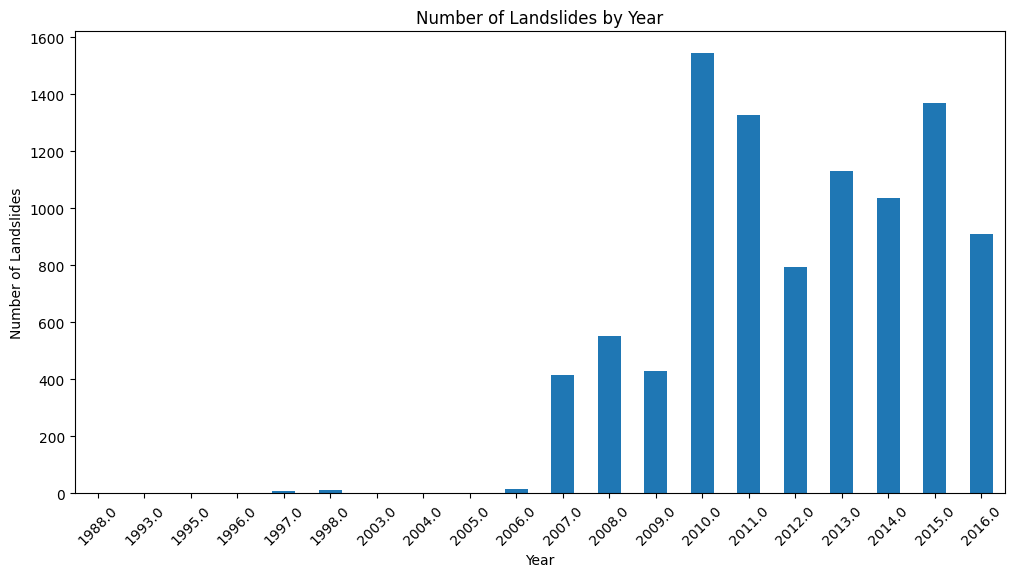

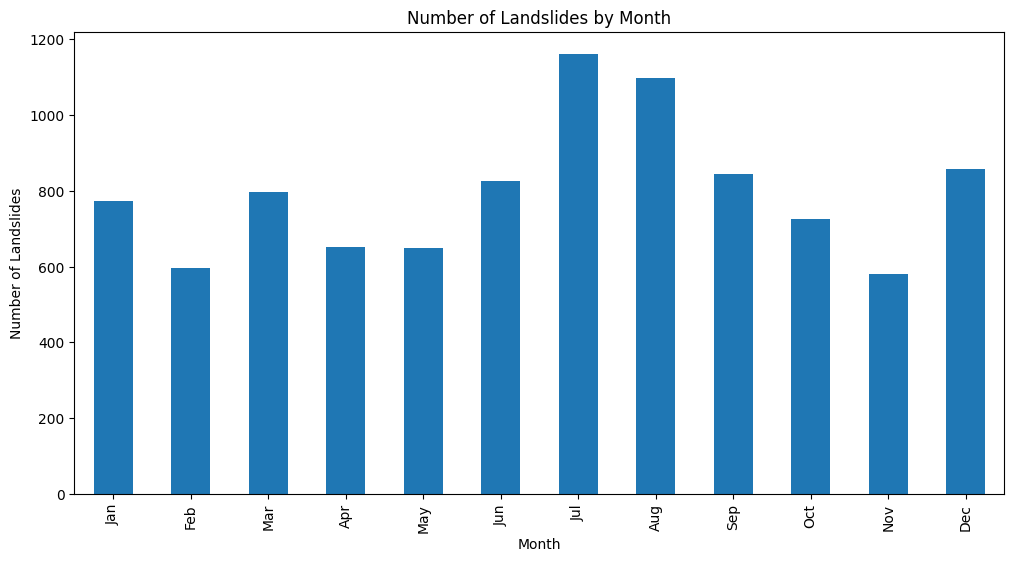

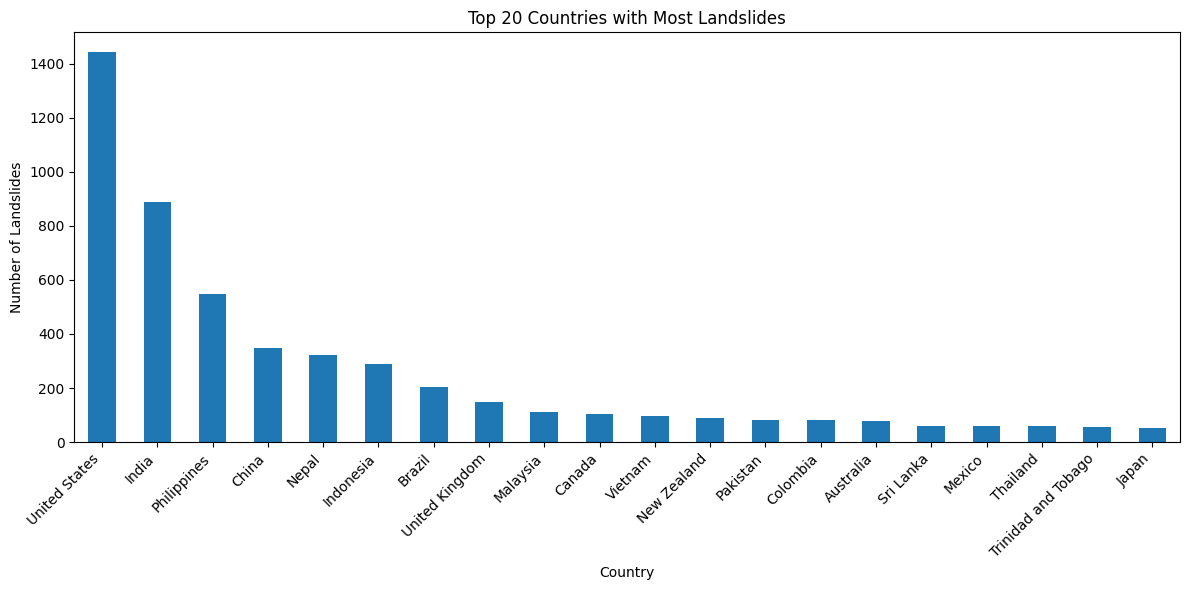

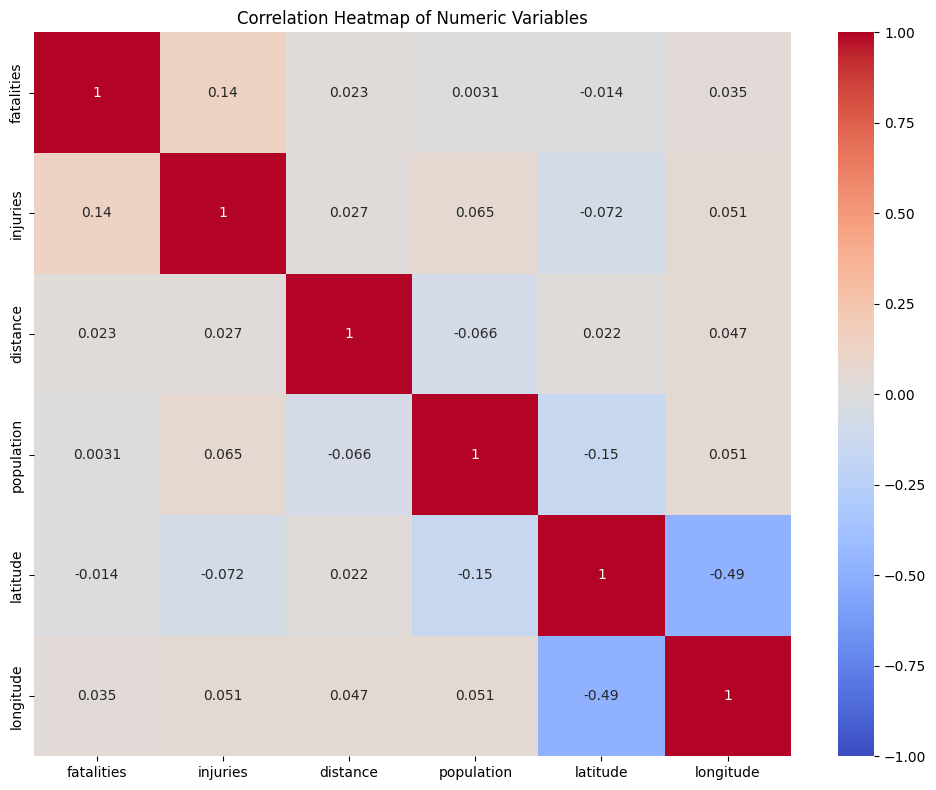

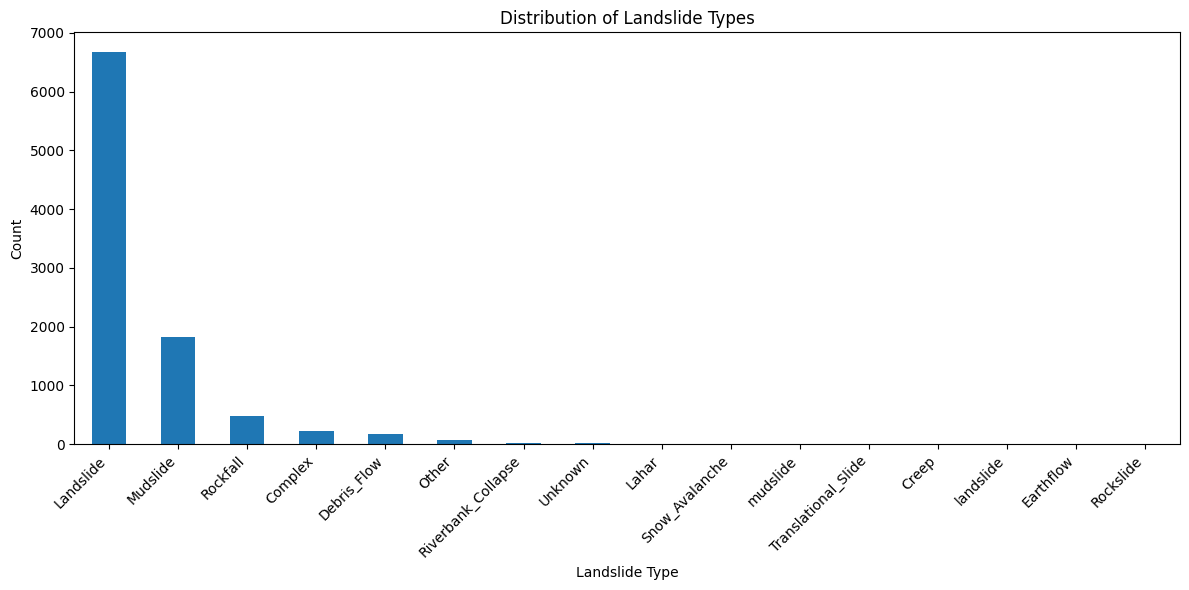

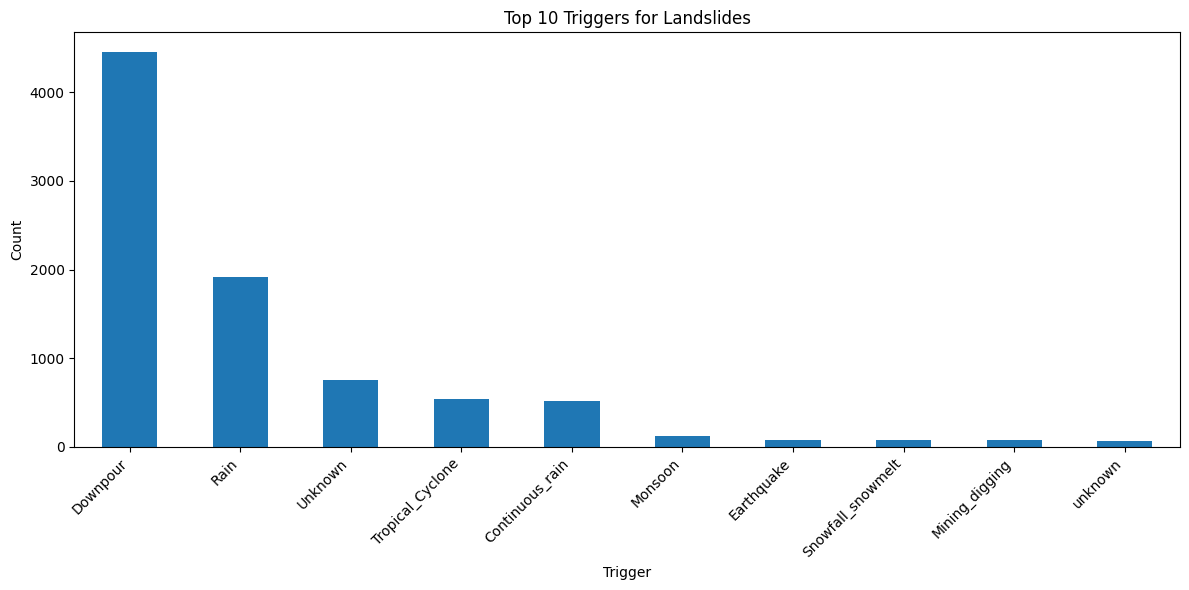

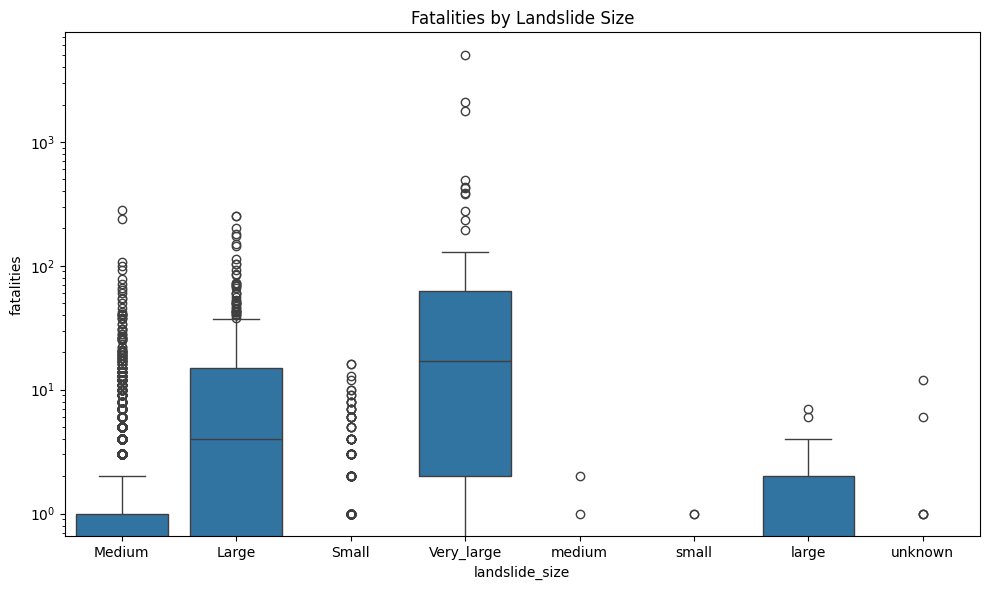

Detailed EDA visualizations completed.
Summary Statistics for Numeric Variables:
        fatalities     injuries     distance    population     latitude  \
count  8212.000000  3942.000000  9530.000000  9.530000e+03  9564.000000   
mean      3.537141     0.852359    11.902521  1.568749e+05    25.661806   
std      64.669763     8.280788    15.618193  8.272427e+05    20.416185   
min       0.000000     0.000000     0.000030  0.000000e+00   -46.774800   
25%       0.000000     0.000000     2.367748  1.940000e+03    13.579075   
50%       0.000000     0.000000     6.264345  7.317000e+03    29.855400   
75%       1.000000     0.000000    15.836362  3.374800e+04    41.134575   
max    5000.000000   374.000000   215.448880  1.269184e+07    72.627500   

         longitude  
count  9564.000000  
mean      3.815776  
std     100.238678  
min    -170.799800  
25%    -104.920000  
50%      23.184050  
75%      94.359700  
max     179.422100  
Top 5 Countries with Most Landslides:
country
United S

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Read the CSV file
df = pd.read_csv('TASK.csv', encoding='utf-8')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Temporal analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Yearly trend
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')
plt.title('Number of Landslides by Year')
plt.xlabel('Year')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45)
plt.show()

# Monthly trend
monthly_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Number of Landslides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Landslides')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Geographical analysis
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries with Most Landslides')
plt.xlabel('Country')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation analysis
numeric_cols = ['fatalities', 'injuries', 'distance', 'population', 'latitude', 'longitude']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Landslide type analysis
plt.figure(figsize=(12, 6))
df['landslide_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Landslide Types')
plt.xlabel('Landslide Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Trigger analysis
plt.figure(figsize=(12, 6))
df['trigger'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Triggers for Landslides')
plt.xlabel('Trigger')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Fatalities vs Landslide Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='landslide_size', y='fatalities', data=df)
plt.title('Fatalities by Landslide Size')
plt.yscale('log')
plt.tight_layout()
plt.show()

print("Detailed EDA visualizations completed.")

# Summary statistics
print("\
Summary Statistics for Numeric Variables:")
print(df[numeric_cols].describe())

print("\
Top 5 Countries with Most Landslides:")
print(df['country'].value_counts().head())

print("\
Most Common Landslide Types:")
print(df['landslide_type'].value_counts().head())

print("\
Most Common Triggers:")
print(df['trigger'].value_counts().head())

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from tqdm import tqdm
selected_features = [
    'date', 'country', 'hazard_type', 'landslide_type', 'trigger',
    'fatalities', 'injuries', 'latitude', 'longitude', 'distance', 'population'
]

df_selected = df[selected_features].copy()

# Create temporal features
df_selected['year'] = df_selected['date'].dt.year
df_selected['month'] = df_selected['date'].dt.month
df_selected['day'] = df_selected['date'].dt.day
df_selected['day_of_week'] = df_selected['date'].dt.dayofweek
df_selected['is_weekend'] = df_selected['day_of_week'].isin([5, 6]).astype(int)
df_selected['season'] = df_selected['month'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0})

# Create a feature for total casualties
df_selected['total_casualties'] = df_selected['fatalities'] + df_selected['injuries']

# Create a feature for population density (assuming 'distance' is in km and represents the radius of the affected area)
df_selected['affected_area'] = np.pi * df_selected['distance']**2
df_selected['population_density'] = df_selected['population'] / df_selected['affected_area']

# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['country', 'hazard_type', 'landslide_type', 'trigger']
for col in tqdm(categorical_columns, desc="Encoding categorical variables"):
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# Handle missing values
numeric_columns = ['fatalities', 'injuries', 'latitude', 'longitude', 'distance', 'population', 'total_casualties', 'population_density']
imputer = SimpleImputer(strategy='median')
df_selected[numeric_columns] = imputer.fit_transform(df_selected[numeric_columns])

# Drop the original date column
df_selected = df_selected.drop('date', axis=1)

# Display info about the engineered dataset
print(df_selected.info())

# Display the first few rows of the engineered dataset
print("\
First few rows of the engineered dataset:")
print(df_selected.head())

# Display summary statistics of the engineered dataset
print("\
Summary statistics of the engineered dataset:")
print(df_selected.describe())

# Save the engineered dataset
df_selected.to_csv('engineered_landslide_data.csv', index=False)
print("\
Engineered dataset saved as 'engineered_landslide_data.csv'")

print("Feature engineering completed.")

Encoding categorical variables: 100%|██████████| 4/4 [00:00<00:00, 201.48it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             9564 non-null   int32  
 1   hazard_type         9564 non-null   int32  
 2   landslide_type      9564 non-null   int32  
 3   trigger             9564 non-null   int32  
 4   fatalities          9564 non-null   float64
 5   injuries            9564 non-null   float64
 6   latitude            9564 non-null   float64
 7   longitude           9564 non-null   float64
 8   distance            9564 non-null   float64
 9   population          9564 non-null   float64
 10  year                9563 non-null   float64
 11  month               9563 non-null   float64
 12  day                 9563 non-null   float64
 13  day_of_week         9563 non-null   float64
 14  is_weekend          9564 non-null   int32  
 15  season              9563 non-null   float64
 16  total_

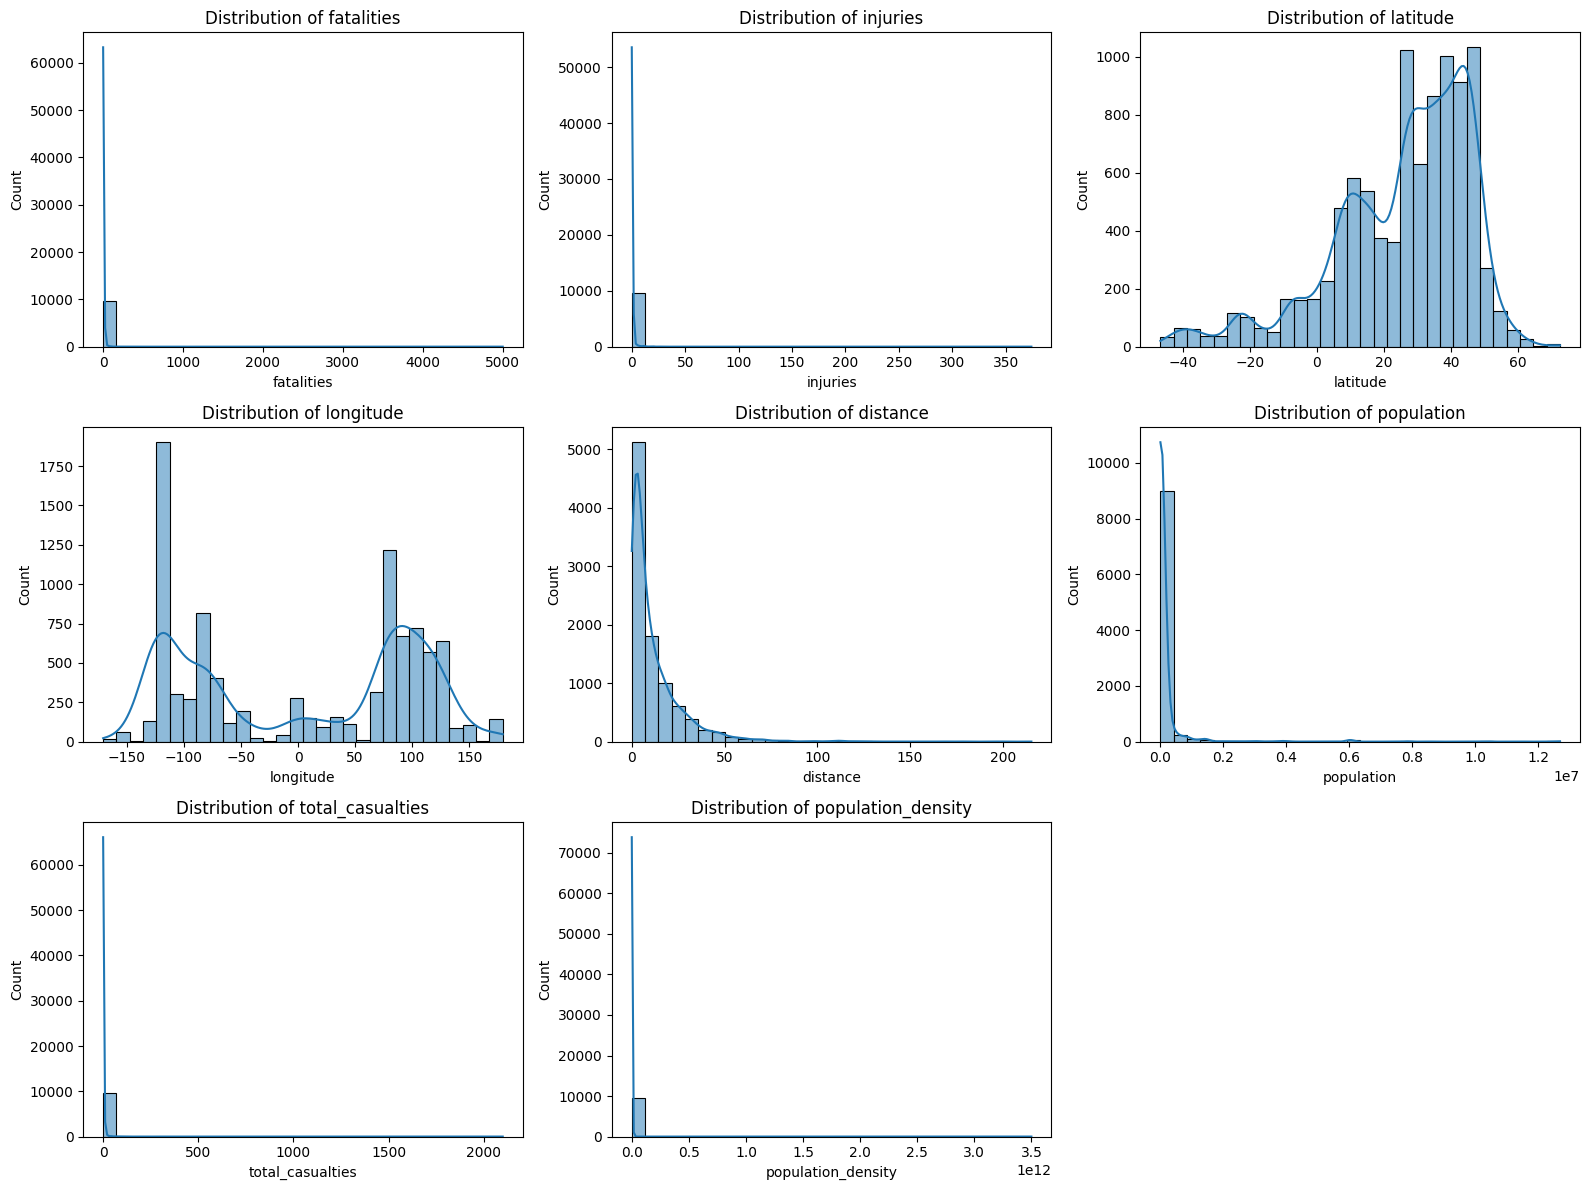

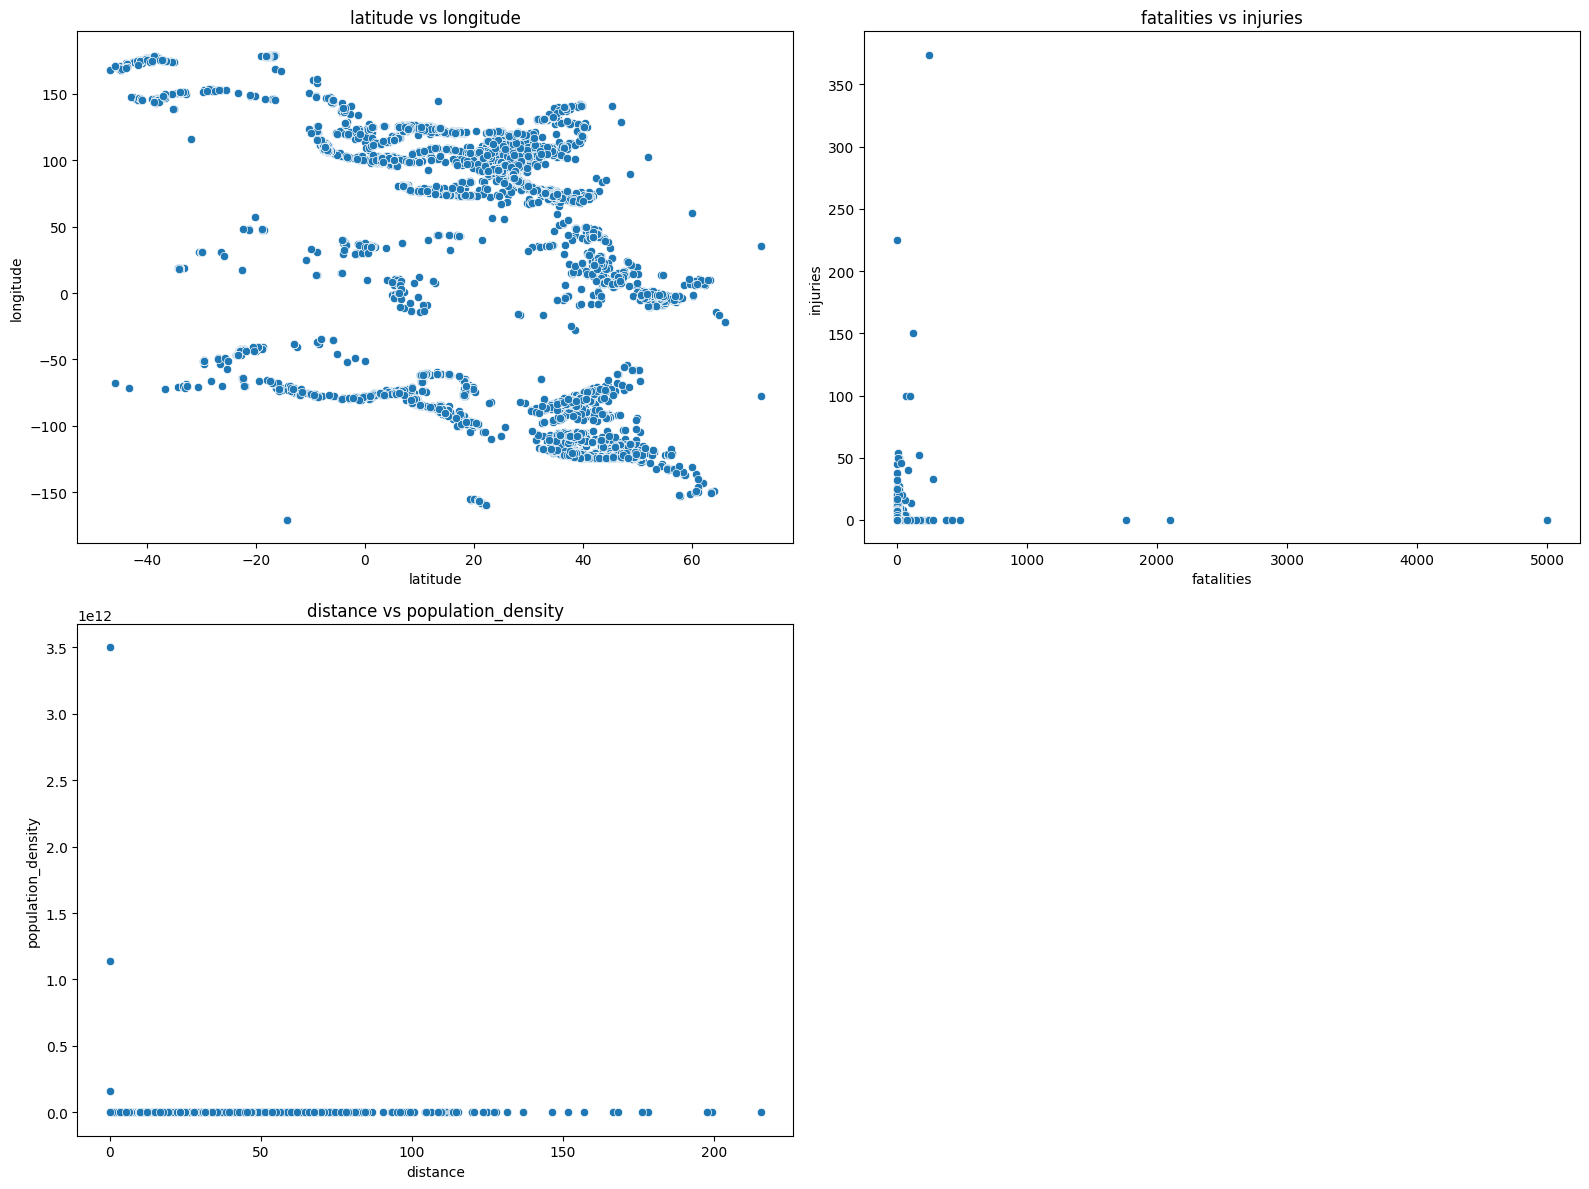

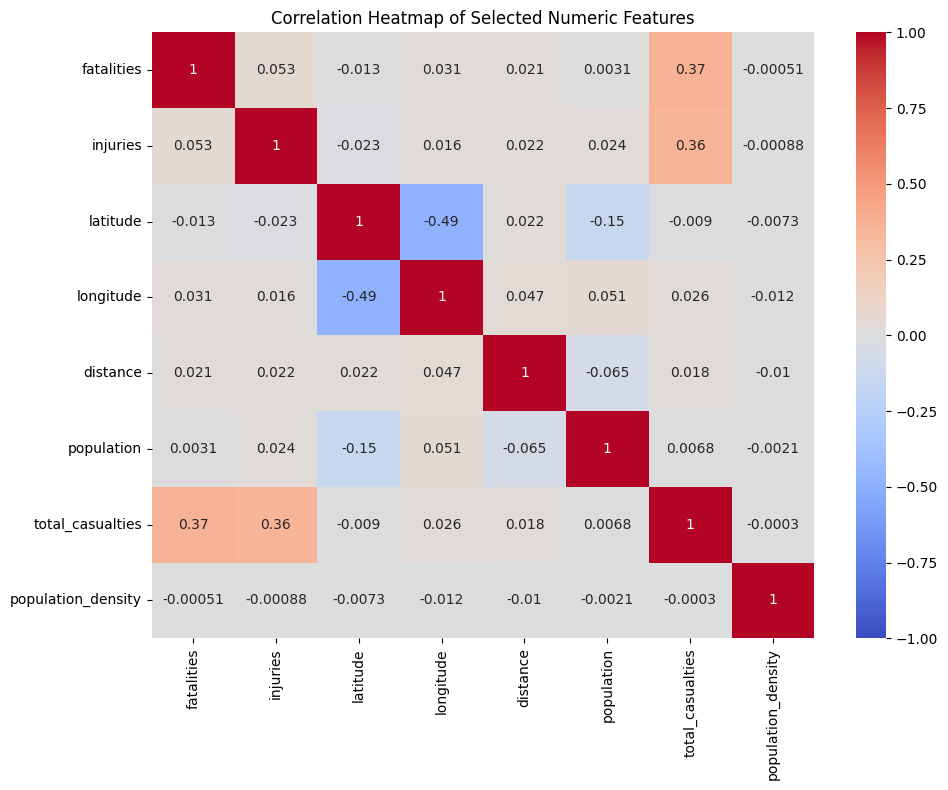

Univariate and bivariate analysis completed.


In [7]:
# Univariate Analysis
plt.figure(figsize=(16, 12))

# Plot histograms for numeric features
numeric_features = ['fatalities', 'injuries', 'latitude', 'longitude', 'distance', 'population', 'total_casualties', 'population_density']
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_selected[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Bivariate Analysis
plt.figure(figsize=(16, 12))

# Scatter plots for pairs of numeric features
pairs = [('latitude', 'longitude'), ('fatalities', 'injuries'), ('distance', 'population_density')]
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df_selected, x=x, y=y)
    plt.title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

# Correlation heatmap for selected features
plt.figure(figsize=(10, 8))
corr_matrix = df_selected[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Selected Numeric Features')
plt.tight_layout()
plt.show()

print("Univariate and bivariate analysis completed.")